# 基于TiVA数据的我国高科技行业全球价值链地位测算


In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import warnings; warnings.simplefilter('ignore') 
import xlrd
import xlwt
import matplotlib.pyplot as plt
import seaborn as sns; 
%matplotlib inline

In [2]:
data1=pd.read_excel('EXGR_D26T27.xlsx')
data2=pd.read_excel('EXGR_DVA_D26T27.xlsx')
data3=pd.read_excel('EXGR_IDC_D26T27.xlsx')
data4=pd.read_excel('EXGR_RIM_D26T27.xlsx')
data1.index=data1.iloc[:,0]
data1.columns=data1.iloc[5,:]
data1=data1.iloc[8:,2:]
data1=data1.drop(index=['DXD: Domestic'])
data2.index=data2.iloc[:,0]
data2.columns=data2.iloc[5,:]
data2=data2.iloc[7:,2:]
data3.index=data3.iloc[:,0]
data3.columns=data3.iloc[5,:]
data3=data3.iloc[7:,2:]
data4.index=data4.iloc[:,0]
data4.columns=data4.iloc[5,:]
data4=data4.iloc[7:,2:]

In [3]:
index=data1.index
columns=data1.columns

In [4]:
FV=data2.loc['CHN: China (People\'s Republic of)']
IV=data3.loc['CHN: China (People\'s Republic of)']+data4.loc['CHN: China (People\'s Republic of)']
E=data1.loc['CHN: China (People\'s Republic of)']
GVC_position=np.zeros((1,11))
for i in range(11):
    a1=FV[i]
    a2=IV[i]
    a3=E[i]
    GVC_position[0][i]=np.log(1+a1/a3)+np.log(1+a2/a3)

In [5]:
from datetime import datetime
data5=pd.read_excel('Categorical_EPU_Data.xlsx')
data5.index=data5.loc[:,'Date']
data5.index = pd.to_datetime(data5.index)

In [6]:
ts=data5['9. Trade policy']

In [7]:
TPU=np.zeros((1,11))
for i in range(2005,2016,1):
    TPU[0][i-2005]=ts[str(i)].sum()
    

In [8]:
GVC_df=pd.DataFrame(GVC_position)
TPU_df=pd.DataFrame(TPU)

In [12]:
data_mix=pd.concat([GVC_df.T,TPU_df.T],axis=1)
data_mix.columns=['GVC_position','TPU']
data_mix=np.log(data_mix)

Text(0.5,1,'2 dimensions Plot')

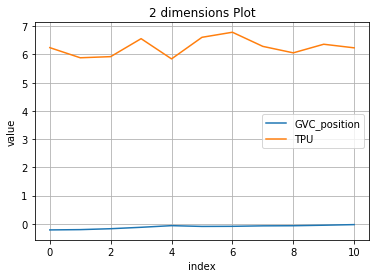

In [13]:
plt.plot(data_mix['GVC_position'], lw=1.5, label='GVC_position')
plt.plot(data_mix['TPU'], lw=1.5, label='TPU')

plt.grid(True)
plt.legend()
plt.xlabel('index')
plt.ylabel('value')
plt.title('2 dimensions Plot')

In [14]:
import statsmodels.api as sm
x=data_mix['TPU']
X=sm.add_constant(x)
y=data_mix['GVC_position'].values
model=sm.OLS(y,X)
results=model.fit()
results.summary()

C:\ProgramData\Anaconda2\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                 -0.038
Method:                 Least Squares   F-statistic:                    0.6356
Date:                Thu, 10 Dec 2020   Prob (F-statistic):              0.446
Time:                        15:59:48   Log-Likelihood:                 15.527
No. Observations:                  11   AIC:                            -27.05
Df Residuals:                       9   BIC:                            -26.26
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4346      0.415     -1.048      0.322      -1.372       0.503
TPU            0.0528      0.066      0.797      0.446      -0.097       0.203
==============================================================================
Omnibus:                        1.041   Durbin-Watson:                   0.488
Prob(Omnibus):                  0.594   Jarque-Bera (JB):                0.779
Skew:                          -0.361   Prob(JB):                        0.677
Kurtosis:                       1.915   Cond. No.                         135.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [327]:
data_mix

,GVC_position,TPU
0,0.808051,513.755241
1,0.816295,358.718447
2,0.843112,373.367746
3,0.886755,705.571257
4,0.939703,344.879929
5,0.914677,740.430591
6,0.918035,885.743913
7,0.933244,536.843301
8,0.937097,427.096163
9,0.954463,579.195332
